## Data pre-processing and data augmentation 
from this [tutorial](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html) 

In [1]:
import glob
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


Objectives:
- to make most of few training examples "augment" via random transformations so model never sees the same image twice
- helps prevent overfitting and model to generalize better

ImageDataGenerator class allows you to:
- generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches) indefinitely… 
    - what do “tensor image data”? “real-time data augmentation”? mean
    - why “yields batch indefinitely in infinite loop”?
- configures random transformations and normalization operations performed on image data during training
    - how are they random? is this related to shuffle? (which defaults to True)
- instantiate generators of augmentated image batches (and their labels) via methods `.flow(data, lables)` or `.flow_from_directory(directory)` 
- `.flow` takes numpy data & label array (X,y)
- `.flow_from_directory` takes directory path with one subdirectory per class (png or jpg)
    - target_size: tuple of integers to resize all images
    - color_mode: grayscale or rbg(default) - specifies whether images will be converted to 1 or 3 color channels
    - classes: optional list of subdirectories (eg ['dogs', 'cats']. Defaults to None but if not provided the classes will be automatically inferred
    - class_mode: "categorical", "binary", "sparse" or None - determines type of label arrays
        - categorical: 2D one-hot encoded labels
        - binary: 1D binary labels
        - sparse: 1D integer labels
        - None: no labels returned - generator only yields batches of image data - useful to use with `model.predict_generator()`, `model.evaluate_generator()`, etc 
- both `.flow` and `.flow_from_directory` have batch_size(data fed into the image generator in batches of the given size), shuffle, seed, save_to_dir, save_prefix, save_format
- `.fit` computes internal data stats related to data-dependent transformations (not sure what that means... can fit give me anything interesting... when would you do this other than for featurewise_center, featurewise_std_normalization or zca_whitening)
    - has argument "augment" - whether to fit on randomly augmented samples (why wouldn’t you fit on the augmented data)
    - fit & seed... random seed on fit? 
- these generators can be used with Keras model methods that accept data generators as inputs: `fit_generator`, `evalute_generator` and `predict_generator`



In [26]:
#example code - see keras doc for more options
datagen = ImageDataGenerator(
    
        #integer value range in degrees(0-180) to randomly rotate images
        rotation_range=40,
    
        rescale=1./255,
    
        #width_shift & height_shift are float ranges (as fraction of total width or height)
        #within which to randomly translate/shift
        width_shift_range=0.2,
        height_shift_range=0.2,
    
        #randomly applying shearing transformations
        shear_range=0.2,
    
        #randomly zooming inside pictures
        zoom_range=0.2,
    
        #randomly flips half of the images horizontally
        #relevant when no assumptions of horizontal assymetry - ie real-world pictures
        horizontal_flip=True,
    
        #strategy for filling newly created pixels
        fill_mode='nearest')

Other `ImageDataGenerator` arguments:
- featurewise_center: Boolean. Set input mean to 0 over the dataset.
- samplewise_center: Boolean. Set each sample mean to 0.
- featurewise_std_normalization: Boolean. Divide inputs by std of the dataset.
- samplewise_std_normalization: Boolean. Divide each input by its std.
- zca_whitening: Boolean. Apply ZCA whitening.

## Generate images
- use datagen tool and save to temp folder to test out augmentation strategy

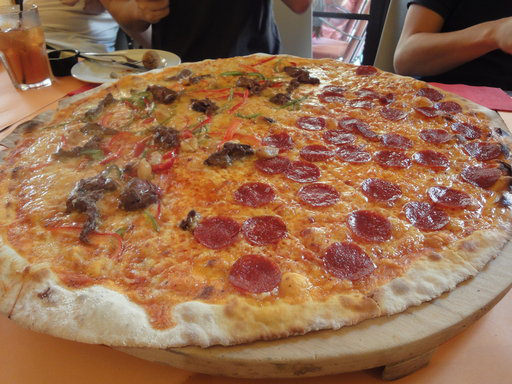

In [27]:
# this is a PIL image
img = load_img('/Users/VanessaG/Desktop/pizza_class_data/train/pizza/40449.jpg') 
img

In [28]:
# this is a Numpy array with shape (3, 150, 150)
x = img_to_array(img) 

In [29]:
x.shape

(384, 512, 3)

In [30]:
x[1]

array([[ 201.,  173.,  110.],
       [ 200.,  171.,  111.],
       [ 198.,  169.,  111.],
       ..., 
       [  13.,   11.,   14.],
       [  13.,   11.,   14.],
       [  15.,   10.,   14.]], dtype=float32)

In [31]:
# this is a Numpy array with shape (1, 3, 150, 150)
x = x.reshape((1,) + x.shape)  

In [32]:
x.shape

(1, 384, 512, 3)

In [33]:
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir='preview', save_prefix='pizza', save_format='jpg'):
    i += 1
    if i > 20:
        # otherwise the generator would loop indefinitely
        break  

In [34]:
pizza_transformed = [f for f in glob.glob('./preview/*') if f.endswith('.jpg')]

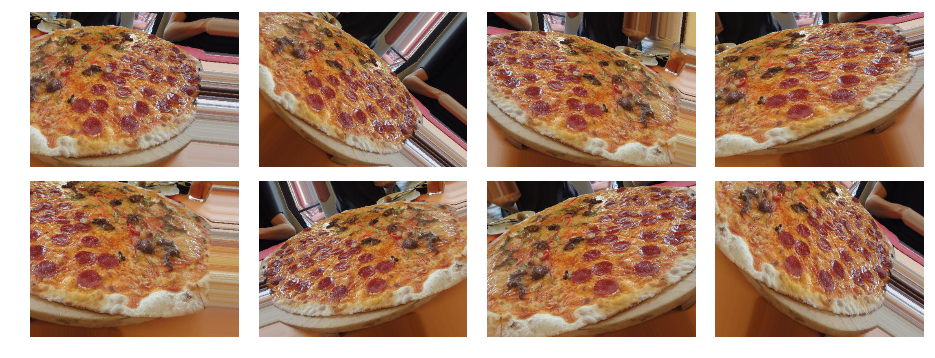

In [35]:
fig, ax = plt.subplots(2,4,figsize=(16,6))
fig.subplots_adjust(hspace=0.025, wspace=0.1)
images = []
for img in pizza_transformed[0:8]:
    image = load_img(img)
    images.append(image)
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(images[i])
    plt.axis("off")